# Very deep

In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
import pandas as pd
from lasso_elastic import clean_semicolumns, prepare_data, prepare_lagged_data
import torch as nn
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import os
from skimage import io, transform # !pip install scikit-image
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision import transforms, utils
from verydeep import *

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

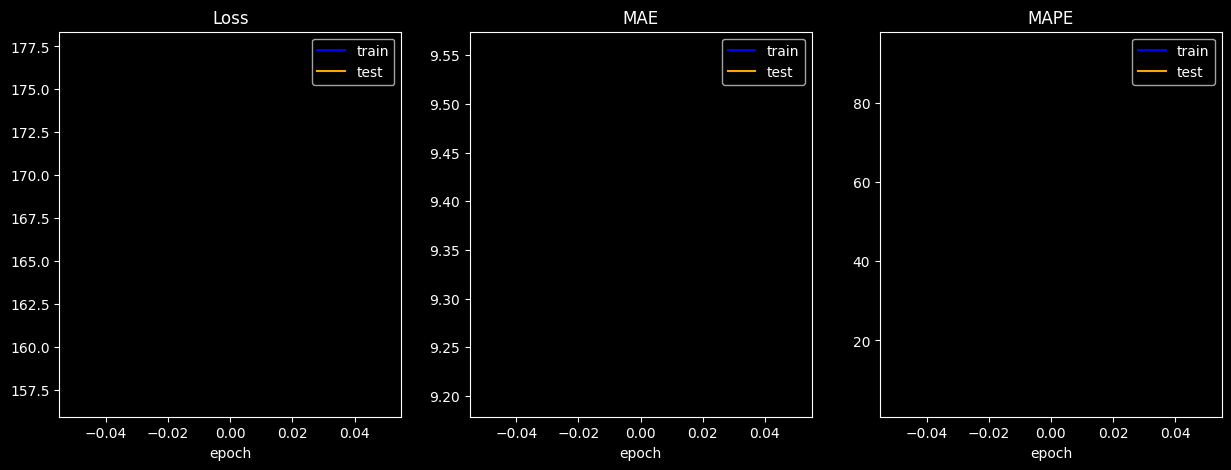

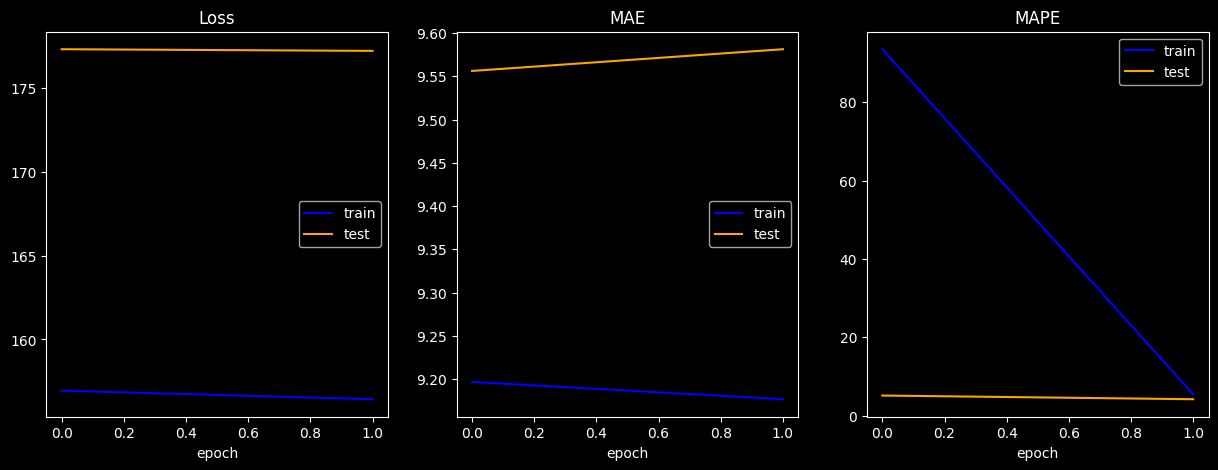

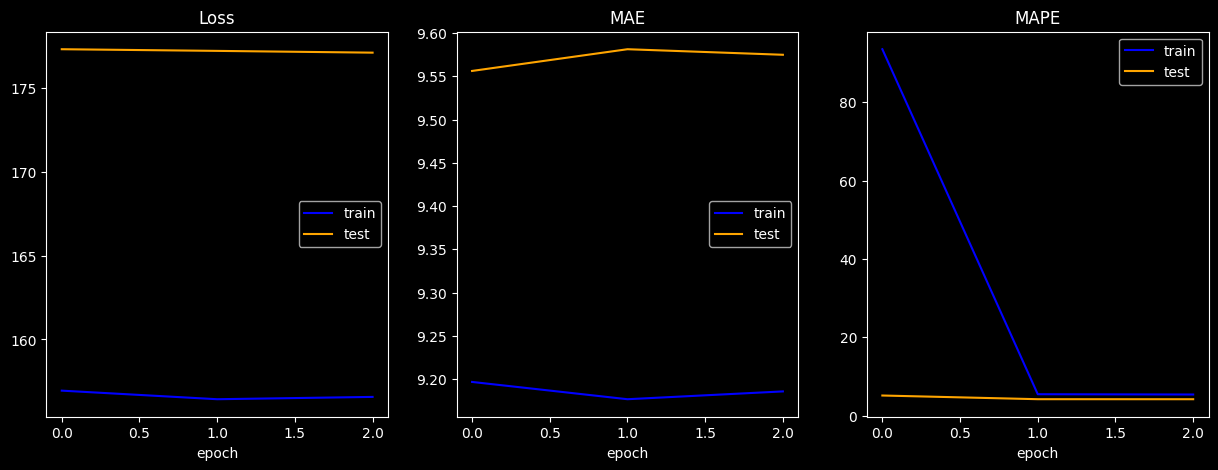

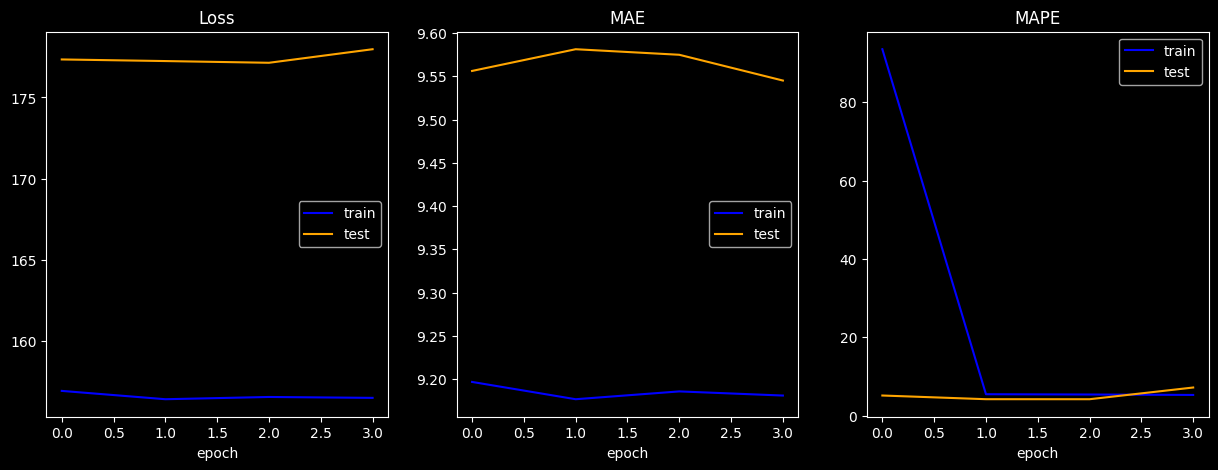

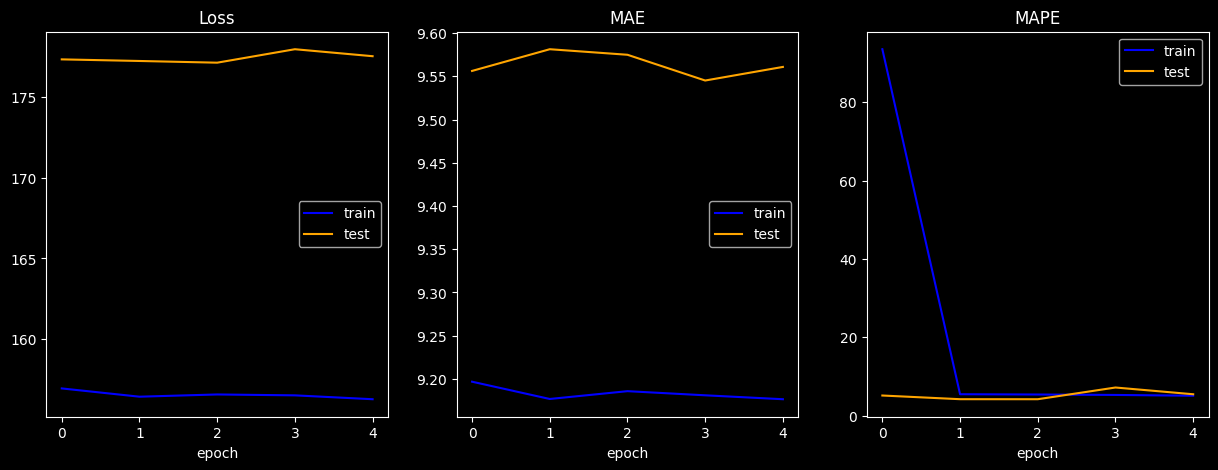

In [12]:
model, scaler = train_model("Data/final_data_198501_200001.csv", 5)

In [11]:
print(model)

data = pd.read_csv("Data/final_data_198501_200001.csv")

prepare_data

VeryDeep(
  (model): Sequential(
    (0): Linear(in_features=47, out_features=50, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=50, out_features=200, bias=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): LeakyReLU(negative_slope=0.01)
    (5): Linear(in_features=200, out_features=200, bias=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Linear(in_features=200, out_features=140, bias=True)
    (8): LeakyReLU(negative_slope=0.01)
    (9): Linear(in_features=140, out_features=80, bias=True)
    (10): LeakyReLU(negative_slope=0.01)
    (11): Linear(in_features=80, out_features=200, bias=True)
    (12): Dropout(p=0.3, inplace=False)
    (13): LeakyReLU(negative_slope=0.01)
    (14): Linear(in_features=200, out_features=600, bias=True)
    (15): LeakyReLU(negative_slope=0.01)
    (16): Linear(in_features=600, out_features=500, bias=True)
    (17): LeakyReLU(negative_slope=0.01)
    (18): Linear(in_features=500, out_features=1000, bias=True)
    (1

NameError: name 'X' is not defined

In [19]:
def print_col_name_after_lasso(data_path, method = "lasso"):

    y = data_path.split(".")[0].split("/")[1].split("_")
    year_start, year_end = y[-2], y[-1]

    if method == "lasso":
        results_table = pd.read_csv(f"output/list_predictors_lasso_bootstrap_{year_start}_{year_end}.csv")

    elif method.lower() == "elastic":
        results_table = pd.read_csv(f"output/list_predictors_elastic_bootstrap_{year_start}_{year_end}.csv")

    display(results_table.columns.tolist())

print_col_name_after_lasso("Data/final_data_199501_201001.csv")

['Illiquidity',
 'AM',
 'ReturnSkew',
 'dVolPut',
 'IdioVolAHT',
 'EarningsSurprise',
 'MaxRet',
 'ForecastDispersion',
 'IndMom',
 'ExchSwitch',
 'dVolCall',
 'NOA',
 'ReturnSkew3F',
 'PayoutYield',
 'Price',
 'DivInit',
 'CF',
 'RealizedVol',
 'BetaTailRisk',
 'IdioVol3F',
 'Mom6m',
 'Size',
 'MeanRankRevGrowth',
 'AdExp',
 'Leverage',
 'BM',
 'DolVol',
 'betaVIX',
 'ConvDebt',
 'High52',
 'BidAskSpread',
 'RoE',
 'EarningsConsistency',
 'STreversal']

# Trash

In [237]:
data = clean_semicolumns(pd.read_csv("Data/lasso_lagged.csv"))
data = prepare_lagged_data(data)
X, y, pred = prepare_data(data)
data.head()

100%|██████████| 702/702 [00:04<00:00, 152.02it/s]


,permno,yyyymm,AM,AOP,AbnormalAccruals,Accruals,AccrualsBM,Activism1,Activism2,AdExp,AgeIPO,return,return_lag
0,10009,198104.0,0.073079,0.037279,0.013079,0.010979,0.003479,0.001379,-0.005321,0.022679,-0.022621,-0.004445,0.025585
1,10009,198105.0,0.035049,0.056249,0.073149,0.067449,0.024749,0.050749,0.080749,0.077549,0.050949,0.025585,0.043327
2,10009,198106.0,0.000060,0.012960,0.006860,0.012760,0.005660,0.021560,0.013460,0.023760,0.032060,0.043327,0.059408
3,10009,198108.0,0.036287,-0.002313,-0.013513,0.027787,0.004987,0.050487,0.025787,-0.000413,0.038187,0.059408,-0.069386
4,10009,198109.0,0.098887,0.045487,0.030487,0.012987,0.042687,-0.069913,0.016087,0.043787,-0.022913,-0.069386,0.057222


In [24]:
# Prepare datasets
features, target, pred = prepare_data(data)

# Train-test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the data
def standardize_data(X_train_raw, X_test_raw):
    """Takes the raw predictors for training and testing and return them after standardization and also returns the scaler"""
    scaler = StandardScaler().fit(X_train_raw)
    X_train = scaler.transform(X_train_raw)
    X_test = scaler.transform(X_test_raw)

    return X_train, X_test, scaler

X_train, X_test, scaler = standardize_data(X_train_raw, X_test_raw)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

print(X_train_tensor.shape)
print(y_train_tensor.shape)
print(X_test_tensor.shape)
print(y_test_tensor.shape)


torch.Size([77778, 10])
torch.Size([77778, 1, 1])
torch.Size([19445, 10])
torch.Size([19445, 1, 1])


In [27]:
# Create TensorDataset and DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=30, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=30, shuffle=True)

print(train_loader)
print(test_loader)

In [61]:
# Create our simple deep network
class VeryDeep(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train_tensor.shape[1], 50),
            nn.LeakyReLU(),
            nn.Linear(50, 200),
            nn.LeakyReLU(),
            nn.Linear(200, 200),
            nn.LeakyReLU(),
            nn.Linear(200, 140), 
            nn.LeakyReLU(),
            nn.Linear(140, 80),
            nn.LeakyReLU(),
            nn.Linear(80, 200),
            nn.LeakyReLU(),
            nn.Linear(200, 50), 
            nn.LeakyReLU(),
            nn.Linear(50, 1), 
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [59]:
model = VeryDeep()
print(model(X_train_tensor[1]))
print(y_train_tensor[1])


tensor([0.0120], grad_fn=<ViewBackward0>)
tensor([[-0.0565]])


In [63]:
print(model)
summary(model, X_train_tensor[1].shape)
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print('\n\n')
print('number of parameters')
print(count_parameters(model))

VeryDeep(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=124, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=124, out_features=200, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=200, out_features=90, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=90, out_features=12, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Linear(in_features=12, out_features=200, bias=True)
    (9): LeakyReLU(negative_slope=0.01)
    (10): Linear(in_features=200, out_features=1500, bias=True)
    (11): LeakyReLU(negative_slope=0.01)
    (12): Linear(in_features=1500, out_features=12, bias=True)
    (13): LeakyReLU(negative_slope=0.01)
    (14): Linear(in_features=12, out_features=1, bias=True)
  )
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 124]           

In [241]:
from tqdm import tqdm #to see the progress of training
from IPython.display import clear_output


# First we perform training 
def epoch_TRAIN(model, optimizer, criterion, metrics, train_loader, device):
    true_values = []
    pred_values = []

    
    EPOCH_LOSS = 0
    METRICS = dict(zip(metrics.keys(), torch.zeros(len(metrics))))

    for k, (x, y) in tqdm(enumerate(train_loader)):
        
        model.train()
        
        predictors = x.to(device)
        target_return = y.to(device)

        optimizer.zero_grad() # clear gradient

        predicted_return = model(predictors) # feed the model with predictors

        # print("PREDICTION: ", predicted_return.squeeze())
        # print("TRUE VALUE: ", target_return.squeeze())
        true_values.append(target_return)
        pred_values.append(predicted_return)
        loss = criterion(predicted_return, target_return) # compute the loss between true and predicted values

        loss.backward()     # back pass in the model
        optimizer.step()    # optimize

        # Compute metrics to keep track of the evolution
        with torch.no_grad():
            for metric in METRICS.keys():
                METRICS[metric] += metrics[metric](predicted_return, target_return.squeeze())

        EPOCH_LOSS += loss.item() # sum all losses from batches

    EPOCH_LOSS /= len(train_loader) # average the loss
    for metric in METRICS.keys():
          METRICS[metric] /= len(train_loader) # average the metrics

    # clear_output() 

    print(f"LOSS: {EPOCH_LOSS:.4f} --", ", ".join([f'{k}: {METRICS[k]:.4f}' for k in METRICS.keys()]))
    
    return EPOCH_LOSS,  METRICS

metrics = {'MAE': mean_absolute_error, "MSE": mean_squared_error}

train_loss, train_metrics = epoch_TRAIN(model, optim.Adam(model.parameters(), lr=0.001), nn.MSELoss(), metrics, train_loader, device='cpu')

2593it [00:11, 222.42it/s]

LOSS: 0.0088 -- MAE: 0.0668, MSE: 0.0088


In [165]:
# print(next(iter(test_loader)))
x = next(iter(test_loader))

In [177]:
len(x)
x[0].shape
pred = model(x[0])
print(pred.squeeze())
print(x[1].squeeze())
print(x[1][1])

tensor([0.0135, 0.0135, 0.0135, 0.0135, 0.0135, 0.0135, 0.0135, 0.0135, 0.0135,
        0.0135, 0.0135, 0.0135, 0.0135, 0.0135, 0.0135, 0.0135, 0.0135, 0.0135,
        0.0135, 0.0135, 0.0135, 0.0135, 0.0135, 0.0135, 0.0135, 0.0135, 0.0135,
        0.0135, 0.0135, 0.0135], grad_fn=<SqueezeBackward0>)
tensor([ 0.1376,  0.0213,  0.0308,  0.1025, -0.1057, -0.0568, -0.0030,  0.0702,
         0.3452,  0.0018, -0.0244, -0.0045, -0.0399, -0.0478,  0.0718,  0.0157,
        -0.0360,  0.1283,  0.0049, -0.0878,  0.1226, -0.1555, -0.0909,  0.0083,
         0.0245, -0.0931, -0.0159, -0.1040,  0.0103,  0.0784])
tensor([[0.0213]])


In [178]:
# Then we perform evaluation 
def epoch_EVAL(model, criterion, metrics, test_loader, device):
    
    model.eval()
    
    LOSS = 0
    METRICS = dict(zip(metrics.keys(), torch.zeros(len(metrics))))

    for _, (x, y) in tqdm(enumerate(test_loader)):
        with torch.no_grad():
            predictors = x.to(device)
            target_return = y.to(device)

            predicted_return = model(predictors) # feed the model with predictors

            loss = criterion(predicted_return, target_return) # compute the loss between true and predicted values

            # Compute metrics to keep track of the evolution
            for metric in METRICS.keys():
                METRICS[metric] += metrics[metric](predicted_return, target_return.squeeze())

            LOSS += loss.item() # sum all losses from batches

    LOSS /= len(train_loader) # average the loss

    for metric in METRICS.keys():
          METRICS[metric] /= len(train_loader) # average the metrics

    clear_output() 
    print("END OF EVALUATION EPOCH")
    print(f"LOSS: {LOSS:.4f} --", ", ".join([f'{k}: {METRICS[k]:.4f}' for k in METRICS.keys()]))
    return LOSS,  METRICS

# test_loss, test_metrics = epoch_EVAL(model, nn.MSELoss(), metrics, test_loader, device='cpu')


END OF EVALUATION EPOCH
LOSS: 0.0021 -- MAE: 0.0168


In [187]:
def plot_training(train_loss, test_loss, metrics_names, train_metrics_logs, test_metrics_logs):
    _, ax = plt.subplots(1, len(metrics_names) + 1, figsize=((len(metrics_names) + 1) * 5, 5))

    ax[0].plot(train_loss, c='blue', label='train')
    ax[0].plot(test_loss, c='orange', label='test')
    ax[0].set_title('Loss')
    ax[0].set_xlabel('epoch')
    ax[0].legend()

    for i in range(len(metrics_names)):
        ax[i + 1].plot(train_metrics_logs[i], c='blue', label='train')
        ax[i + 1].plot(test_metrics_logs[i], c='orange', label='test')
        ax[i + 1].set_title(metrics_names[i])
        ax[i + 1].set_xlabel('epoch')
        ax[i + 1].legend()

    plt.show()

#actually you have to use validation for each step of training, but now we will focus only on the toy example and will track the perfromance on test
def update_metrics_log(metrics_names, metrics_log, new_metrics_dict):
    for i in range(len(metrics_names)):
        curr_metric_name = metrics_names[i]
        metrics_log[i].append(new_metrics_dict[curr_metric_name])
    return metrics_log


def train_cycle(model, optimizer, criterion, metrics, train_loader, test_loader, n_epochs, device):
    train_loss_log,  test_loss_log = [], []
    metrics_names = list(metrics.keys())
    train_metrics_log = [[] for i in range(len(metrics))]
    test_metrics_log = [[] for i in range(len(metrics))]


    for epoch in range(n_epochs):
        print("Epoch {0} of {1}".format(epoch, n_epochs))
        train_loss, train_metrics = epoch_TRAIN(model, optimizer, criterion, metrics, train_loader, device)

        test_loss, test_metrics = epoch_EVAL(model, criterion, metrics, test_loader, device)

        train_loss_log.append(train_loss)
        train_metrics_log = update_metrics_log(metrics_names, train_metrics_log, train_metrics)

        test_loss_log.append(test_loss)
        test_metrics_log = update_metrics_log(metrics_names, test_metrics_log, test_metrics)

        plot_training(train_loss_log, test_loss_log, metrics_names, train_metrics_log, test_metrics_log)
    return train_metrics_log, test_metrics_log


metrics_name = list(metrics.keys())

END OF EVALUATION EPOCH
LOSS: 0.0021 -- MAE: 0.0167


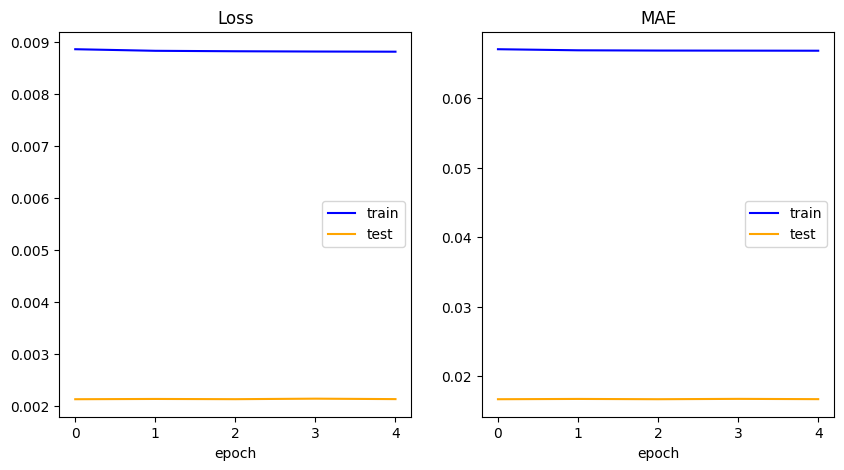

In [188]:
if torch.cuda.is_available():
    device = torch.device('cuda') 
else:
    device = torch.device('cpu')
model = VeryDeep()

metrics = {'MAE': mean_absolute_error}
train_metrics_log, test_metrics_log = train_cycle(model, optim.Adam(model.parameters(), lr=0.001), nn.MSELoss(), metrics, train_loader, test_loader, n_epochs=5, device=device)

In [231]:
# Initialize model, loss function, and optimizer
model = VeryDeep()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_train = []
loss_test = []
metric_train = []
metric_test = []

# Training loop
num_epochs = 50
for epoch in range(num_epochs):

    EPOCH_LOSS,  METRICS = epoch_TRAIN(model, optimizer, criterion, metrics, train_loader, device)
    EPOCH_LOSS_train, METRICS_train = epoch_EVAL(model, criterion, metrics, test_loader, device)
    metric_train.append(METRICS)
    metric_test.append(METRICS_train)
    loss_train.append(EPOCH_LOSS)
    loss_test.append(EPOCH_LOSS_train)

END OF EVALUATION EPOCH
LOSS: 0.0021 -- MAE: 0.0167


In [198]:
# Initialize model, loss function, and optimizer
model = VeryDeep()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
lossss = []

# Training loop
num_epochs = 50
for epoch in range(num_epochs):

    sum_loss = 0

    for k, (x, y) in tqdm(enumerate(train_loader)):
    
        predictors = x.to(device)
        target_return = y.to(device)
        
        model.train()  # Set model to training mode
        
        optimizer.zero_grad()  # Clear gradients
        outputs = model(predictors)  # Forward pass
        loss = criterion(outputs, target_return)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        sum_loss += loss 
    
    lossss.append(sum_loss/(k+1))
    
    # Print loss for each epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

0it [00:00, ?it/s]

2593it [00:09, 266.00it/s]


Epoch [1/50], Loss: 0.013468584977090359


2593it [00:09, 273.27it/s]


Epoch [2/50], Loss: 0.00740898959338665


2593it [00:09, 274.24it/s]


Epoch [3/50], Loss: 0.025864779949188232


2593it [00:09, 272.82it/s]


Epoch [4/50], Loss: 0.003793768584728241


2593it [00:09, 274.06it/s]


Epoch [5/50], Loss: 0.007424372248351574


2593it [00:09, 270.58it/s]


Epoch [6/50], Loss: 0.006396153941750526


2593it [00:09, 270.66it/s]


Epoch [7/50], Loss: 0.009119312278926373


2593it [00:09, 268.17it/s]


Epoch [8/50], Loss: 0.0031012187246233225


2593it [00:09, 272.89it/s]


Epoch [9/50], Loss: 0.004743954166769981


2593it [00:09, 271.13it/s]


Epoch [10/50], Loss: 0.004314064048230648


2593it [00:09, 272.66it/s]


Epoch [11/50], Loss: 0.008950439281761646


2593it [00:09, 260.20it/s]


Epoch [12/50], Loss: 0.008339617401361465


2593it [00:09, 266.55it/s]


Epoch [13/50], Loss: 0.02373795211315155


2593it [00:10, 256.17it/s]


Epoch [14/50], Loss: 0.007865904830396175


2593it [00:11, 221.77it/s]


Epoch [15/50], Loss: 0.0040784189477562904


2593it [00:09, 261.12it/s]


Epoch [16/50], Loss: 0.006778712850064039


2593it [00:09, 265.02it/s]


Epoch [17/50], Loss: 0.012693752534687519


2593it [00:09, 261.80it/s]


Epoch [18/50], Loss: 0.006762491539120674


2593it [00:10, 238.19it/s]


Epoch [19/50], Loss: 0.008960642851889133


2593it [00:11, 224.92it/s]


Epoch [20/50], Loss: 0.004308893345296383


2593it [00:07, 333.95it/s]


Epoch [21/50], Loss: 0.0031051209662109613


2593it [00:07, 350.18it/s]


Epoch [22/50], Loss: 0.003660451387986541


2593it [00:07, 340.49it/s]


Epoch [23/50], Loss: 0.008208087645471096


2593it [00:07, 330.73it/s]


Epoch [24/50], Loss: 0.006259101442992687


2593it [00:09, 274.18it/s]


Epoch [25/50], Loss: 0.029927270486950874


2593it [00:07, 325.70it/s]


Epoch [26/50], Loss: 0.0046196491457521915


2593it [00:08, 303.81it/s]


Epoch [27/50], Loss: 0.0022165041882544756


2593it [00:08, 303.23it/s]


Epoch [28/50], Loss: 0.011343162506818771


2593it [00:08, 298.65it/s]


Epoch [29/50], Loss: 0.003663865150883794


2593it [00:08, 317.25it/s]


Epoch [30/50], Loss: 0.017140217125415802


2593it [00:07, 326.55it/s]


Epoch [31/50], Loss: 0.009535802528262138


2593it [00:07, 325.33it/s]


Epoch [32/50], Loss: 0.008290957659482956


2593it [00:07, 328.55it/s]


Epoch [33/50], Loss: 0.04570537805557251


2593it [00:07, 324.57it/s]


Epoch [34/50], Loss: 0.012648467905819416


2593it [00:07, 332.31it/s]


Epoch [35/50], Loss: 0.006314470432698727


2593it [00:07, 330.25it/s]


Epoch [36/50], Loss: 0.006989554967731237


2593it [00:07, 335.08it/s]


Epoch [37/50], Loss: 0.008611617609858513


2593it [00:08, 309.06it/s]


Epoch [38/50], Loss: 0.0035689719952642918


2593it [00:07, 349.88it/s]


Epoch [39/50], Loss: 0.012077518738806248


2593it [00:07, 364.24it/s]


Epoch [40/50], Loss: 0.007085405755788088


2593it [00:07, 349.12it/s]


Epoch [41/50], Loss: 0.009646073915064335


2593it [00:07, 351.63it/s]


Epoch [42/50], Loss: 0.006656855810433626


2593it [00:07, 351.55it/s]


Epoch [43/50], Loss: 0.017396075651049614


2593it [00:07, 346.27it/s]


Epoch [44/50], Loss: 0.0038198954425752163


2593it [00:07, 351.53it/s]


Epoch [45/50], Loss: 0.006551695521920919


2593it [00:07, 358.47it/s]


Epoch [46/50], Loss: 0.009421439841389656


2593it [00:07, 349.88it/s]


Epoch [47/50], Loss: 0.006653578020632267


2593it [00:07, 351.15it/s]


Epoch [48/50], Loss: 0.00790136493742466


2593it [00:07, 352.53it/s]


Epoch [49/50], Loss: 0.007014002185314894


2593it [00:07, 353.90it/s]

Epoch [50/50], Loss: 0.005320054478943348


In [228]:
print(metric_test)
print(metric_train)

[0.016736090183258057, 0.016727302223443985, 0.0167615357786417, 0.016702858731150627, 0.01676655374467373, 0.016826000064611435, 0.016713373363018036, 0.01684042066335678, 0.016688376665115356, 0.016725288704037666]
[0.06695452332496643, 0.06684529781341553, 0.06682079285383224, 0.06678817421197891, 0.06676946580410004, 0.0667603388428688, 0.06675589829683304, 0.06674980372190475, 0.0667511448264122, 0.06675979495048523]


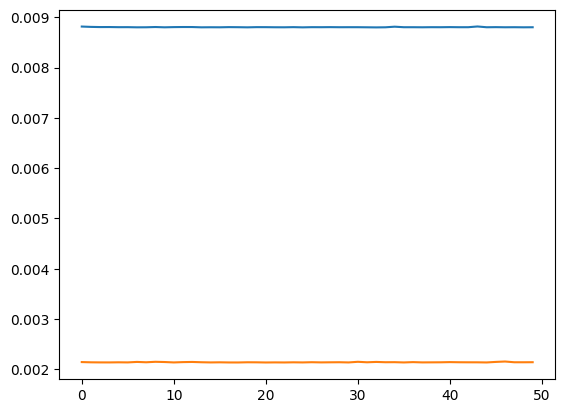

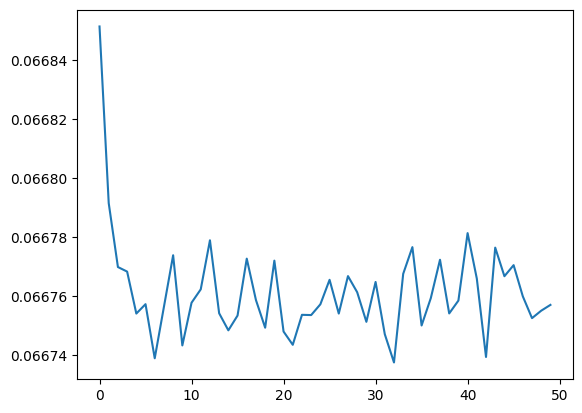

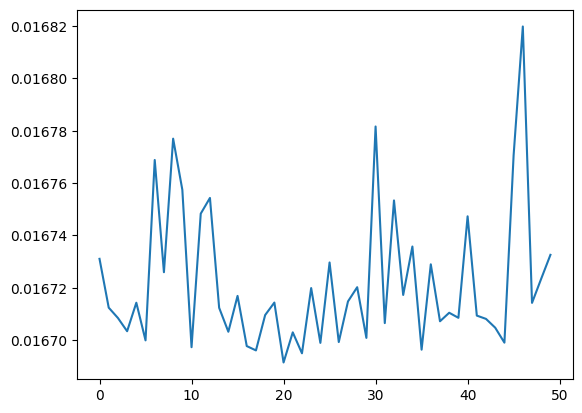

In [234]:
# metric_test = [i['MAE'].item() for i in metric_test]
# metric_train = [i['MAE'].item() for i in metric_train]
plt.plot(list(map(lambda x: x, loss_train)))

plt.plot(list(map(lambda x: x, loss_test)))
plt.show()
plt.plot(list(map(lambda x: x, metric_train)))
plt.show()
plt.plot(list(map(lambda x: x, metric_test)))
plt.show()

In [ ]:
model = VeryDeep()
criterion = nn.MSELoss()
optimizer = optim.Adam(VeryDeep.parameters(), lr=0.001)

# Training loop with mini-batches
epochs = 1000
for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')
